# Group Members

Benjamin Makowsky

# Introduction and Background

Python has always been a favorite for many developers because of it's ease of use and human-like readability. But what is it mainly used for and what should students at universities know about the programming language in order to succeed in the real world marketplace? You read a lot in the news that python is used mainly for machine learning but what other applications could it have? What other technologies are often used in conjunction with python to help with its task? 

These are important questions for students, especially those within this class who are learning this material. My analysis is intended to shed light on these questions and determine what exactly I can do with my knowledge of Python and what else I need to learn in order to succeed. Researching these questions alone it appears that Python is primarily being used for machine learning and that is why my hypothesis reiterates this. 


# Data Description

The data consists of answers to a survey of developers asking about how they use python, their use of IDE and frameworks, and current job position. The data comes from kaggle, is provided by the company Jetbrains and and is completely open for the public to use and furthermore, is not going to be used for any commercial purposes. The data is listed as having a creative commons liscense and as such I have the appropriate permissions needed to do any analysis as needed. JetBrains is a development company that sells IDE's for various programming languages. The data provided is a result of a survey they sent out to users to complete voluntarily to get a better understand of how people are using the Python language. The data spans across language use, frameworks, other languages, country, age category and other various categories. The only confounds I expect in my analysis is bias resulting from the surveyed population. It was not a truly random sample because it was given to a particular population of users who have used PyCharm from the JetBrains corporation. However, I do not expect this have an impact on my final conclusions.

# Privacy/Ethics Considerations:

Because the data comes from a fairly large company and is available for free use, it does not include names or any other personally identifiable information except country and age range. However, the categories are so broad that it would be impossible to identify anyone from the information given. Additionally, I intend to scrub those columns as they will not be a part of my analysis and as a result there are no privacy concerns with the use or distribution of any part of my analysis. Additonally, there are no biases within my data as it does not seperate populations in anyway other than making observations only from users who use python and not other languages. While the results may be skewed because it of the population the survey was given to, I do not expect the need to handle any issues with privacy or ethics. 

# Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('precision', 2)
%matplotlib inline

# Opening Data

In [2]:
#read data
df17 = pd.read_csv('./pythondevsurvey2017_raw_data.csv')
df18 = pd.read_csv('./python_psf_external_18.csv')

/home/Benji0727/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (168,197) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Part 1: Data Cleaning and Preprocessing:

The first step to cleaning data is to look at the data set to determine what it looks like and how much cleaning is going to be needed. I need to determine if the data uses a lot of missing values and if so how to incorporate that into my research and if there is any data that is extraneous and can be seleted.


In [3]:
df17.head(1)

,Is Python the main language you use for your current projects?,None:What other language(s) do you use?,Java:What other language(s) do you use?,JavaScript:What other language(s) do you use?,C/C++:What other language(s) do you use?,PHP:What other language(s) do you use?,C#:What other language(s) do you use?,Ruby:What other language(s) do you use?,Bash / Shell:What other language(s) do you use?,Objective-C:What other language(s) do you use?,...,Technical support:Which of the following best describes your job role(s)?,Data analyst:Which of the following best describes your job role(s)?,Business analyst:Which of the following best describes your job role(s)?,Team lead:Which of the following best describes your job role(s)?,Product manager:Which of the following best describes your job role(s)?,CIO / CEO / CTO:Which of the following best describes your job role(s)?,Systems analyst:Which of the following best describes your job role(s)?,Other - Write In::Which of the following best describes your job role(s)?,Could you tell us your age range?,What country do you live in?
0,Yes,NaN,NaN,JavaScript,NaN,PHP,NaN,NaN,Bash / Shell,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60 or older,Italy


In [4]:
df18.head(1)

,Unnamed: 0,Is Python the main language you use for your current projects?,None:What other language(s) do you use?,Java:What other language(s) do you use?,JavaScript:What other language(s) do you use?,C/C++:What other language(s) do you use?,PHP:What other language(s) do you use?,C#:What other language(s) do you use?,Ruby:What other language(s) do you use?,Bash / Shell:What other language(s) do you use?,...,Technical support:Which of the following best describes your job role(s)?,Data analyst:Which of the following best describes your job role(s)?,Business analyst:Which of the following best describes your job role(s)?,Team lead:Which of the following best describes your job role(s)?,Product manager:Which of the following best describes your job role(s)?,CIO / CEO / CTO:Which of the following best describes your job role(s)?,Systems analyst:Which of the following best describes your job role(s)?,Other Write In::Which of the following best describes your job role(s)?,Could you tell us your age range?,What country do you live in?
0,1,"No, I don’t use Python for my current projects",None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50–59,Antigua and Barbuda



#### Observations:
>Above shows that the data frame df18 has 122 extra columns in it that df17 does not and therefore it is very likely that the dataframes are going to need to be removed because there no comparisons can be made between the data frames. First, I need to determine which columns do not match a column in the other data frame. Luckily, it appears that missing values are not a problem because I can simply count the values that exist within a single column to make an analysis. However, it appears that s

In [5]:
#The most obvious inital column to drop is the extra index column in df18
df18.drop(columns=['Unnamed: 0'],inplace = True )

In [6]:
#Cleate 2 lists of the columns to compare which are extra and which match both data sets
df17_columns = df17.columns.values.tolist()
df18_columns = df18.columns.values.tolist()

In [7]:
#Determine which columns are in df18 that are not in df17
extraColumns18 = []
for title in df18_columns:
    if title not in df17_columns:
        extraColumns18.append(title)

In [8]:
extraColumns18

['For what purposes do you mainly use Python?',
 'Educational purposes:What do you use Python for?',
 'Data analysis:What do you use Python for?',
 'DevOps / System administration / Writing automation scripts:What do you use Python for?',
 'Software testing / Writing automated tests:What do you use Python for?',
 'Software prototyping:What do you use Python for?',
 'Web development:What do you use Python for?',
 'Machine learning:What do you use Python for?',
 'Mobile development:What do you use Python for?',
 'Desktop development:What do you use Python for?',
 'Computer graphics:What do you use Python for?',
 'Network programming:What do you use Python for?',
 'Game development:What do you use Python for?',
 'Multimedia applications development:What do you use Python for?',
 'Embedded development:What do you use Python for?',
 'Programming of web parsers / scrapers / crawlers:What do you use Python for?',
 'Other - Write In::What do you use Python for?',
 'Educational purposes:To what

In [9]:
#We must do the same for df17 to see if there are any columns that would match but are labeled differently
extraColumns17 = []
for title in df17_columns:
    if title not in df18_columns:
        extraColumns17.append(title)

In [10]:
extraColumns17

['Educational purposes:\xa0What do you use Python for?',
 'Data analysis:\xa0What do you use Python for?',
 'DevOps / System administration / Writing automation scripts:\xa0What do you use Python for?',
 'Software testing / Writing automated tests:\xa0What do you use Python for?',
 'Software prototyping:\xa0What do you use Python for?',
 'Web development:\xa0What do you use Python for?',
 'Machine learning:\xa0What do you use Python for?',
 'Mobile development:\xa0What do you use Python for?',
 'Desktop development:\xa0What do you use Python for?',
 'Computer graphics:\xa0What do you use Python for?',
 'Network programming:\xa0What do you use Python for?',
 'Game development:\xa0What do you use Python for?',
 'Multimedia applications development:\xa0What do you use Python for?',
 'Embedded development:\xa0What do you use Python for?',
 'Programming of web parsers / scrapers / crawlers:\xa0What do you use Python for?',
 'Other - Write In::\xa0What do you use Python for?',
 'Installer fr


#### Observations:
>If you compare the names of the columns between df17 and df18 you can see that there are several columns that contain the same information but labeled slightly different so they dont align while trying to make comparisons. Now I must go through and make sure all the names match so that we can properly make comparisons between dataframe columns.

In [11]:
#Rename mislabled columns in df18
#Using a lambda expression to match multiple columns and change them all at the same time
df18.rename(columns=lambda x: x.replace('data science framework(s)', 'framework(s)'), inplace=True)
df18.rename(columns=lambda x: x.replace('Which of the following frameworks / libraries', 'What framework(s)'), inplace=True)
df18.rename(columns=lambda x: x.replace('What web frameworks / libraries ', 'What framework(s)'), inplace=True)
df18.rename(columns=lambda x: x.replace('framework(s)do', 'framework(s) do'), inplace=True)
df18.rename(columns=lambda x: x.replace('Tkinter', 'TkInter'), inplace=True)


#Rename mislabeled columns in df17
df17.rename(columns=lambda x: x.replace('\xa0', ''), inplace=True)
df17.rename(columns=lambda x: x.replace('asyncio', 'Asyncio'), inplace=True)
df17.rename(columns=lambda x: x.replace('six', 'Six'), inplace=True)

In [12]:
#Double Check to determine if we missed any columns
df17_columns = df17.columns.values.tolist()
df18_columns = df18.columns.values.tolist()

extraColumns17 = []
for title in df17_columns:
    if title not in df18_columns:
        extraColumns17.append(title)
extraColumns17

['Installer from python.org:What do you typically use to upgrade your Python version?',
 'Other - Write In::What do you typically use to upgrade your Python version?',
 'NumPy / pandas / Matplotlib / scipy and similar:What framework(s) do you use in addition to Python?',
 'Keras / Theano / TensorFlow / scikit-learn and similar:What framework(s) do you use in addition to Python?',
 'PyQT / PyGTK / wxPython:What framework(s) do you use in addition to Python?',
 'None:What additional technology(s) do you use in addition to Python?',
 'Jupyter Notebook:What additional technology(s) do you use in addition to Python?',
 'Anaconda:What additional technology(s) do you use in addition to Python?',
 'ORM (SQLAlchemy, PonyORM, etc.):What additional technology(s) do you use in addition to Python?',
 'Docker:What additional technology(s) do you use in addition to Python?',
 'Vagrant:What additional technology(s) do you use in addition to Python?',
 'Cloud platforms (Google App Engine, AWS, RackSpac

#### Observations
>After changing the column titles in the dataframe from the 2018 survey so they would match the one from 2017 it is now time to drop the extraneous dataframes. The problem here is that there are a lot of data frames with similar titles but are either unimportant or do not have a matching column in the 2017 survey. To delete each extra column one by one would create ugly code and be inefficient and require a lot of extra lines of code. A much simpler solution is to use a lambda expression to return each column matching a given word and delete several at a single time.

In [13]:
#drop extra columns in df17
df17.drop(df17.filter(regex='IDE').columns, axis=1, inplace = True)
df17.drop(df17.filter(regex='cloud').columns, axis=1, inplace = True)
df17.drop(df17.filter(regex='number').columns, axis=1, inplace = True)
df17.drop(df17.filter(regex='developing').columns, axis=1, inplace = True)
df17.drop(df17.filter(regex='technology').columns, axis=1, inplace = True)
df17.drop(df17.filter(regex='editor').columns, axis=1, inplace = True)
df17.drop(df17.filter(regex='upgrade').columns, axis=1, inplace = True)
df17.drop(df17.filter(regex='None').columns, axis=1, inplace = True)
df17.drop(df17.filter(regex='Other').columns, axis=1, inplace = True)
df17.drop(columns = ['Most of the time, do you...?'],inplace = True)
df17.drop(columns=['What do you use Python for the most?'], axis=1, inplace = True)

#drop extra columns in df18
df18.drop(df18.filter(regex='IDE').columns, axis=1, inplace = True)
df18.drop(df18.filter(regex='cloud').columns, axis=1, inplace = True)
df18.drop(df18.filter(regex='None').columns, axis=1, inplace = True)
df18.drop(df18.filter(regex='Other').columns, axis=1, inplace = True)
df18.drop(df18.filter(regex='isolate').columns, axis=1, inplace = True)
df18.drop(df18.filter(regex='Continuous Integration').columns, axis=1, inplace = True)
df18.drop(df18.filter(regex='Big Data').columns, axis=1, inplace = True)
df18.drop(df18.filter(regex='Which database').columns, axis=1, inplace = True)
df18.drop(df18.filter(regex='upgrade').columns, axis=1, inplace = True)
df18.drop(df18.filter(regex='developing').columns, axis=1, inplace = True)
df18.drop(df18.filter(regex='management').columns, axis=1, inplace = True)
df18.drop(df18.filter(regex='involvedin').columns, axis=1, inplace = True)
df18.drop(df18.filter(regex='ORM').columns, axis=1, inplace = True)
df18.drop(df18.filter(regex='operating system').columns, axis=1, inplace = True)
df18.drop(df18.filter(regex='editor').columns, axis=1, inplace = True)
df18.drop(df18.filter(regex='testing framework').columns, axis=1, inplace = True)
df18.drop(columns=['What do you use Python for the most?'], axis=1, inplace = True)

In [14]:
#Double check to see if there are any extra columns in df17 not in df18
df17_columns = df17.columns.values.tolist()
df18_columns = df18.columns.values.tolist()

extraColumns17 = []
for title in df17_columns:
    if title not in df18_columns:
        extraColumns17.append(title)
extraColumns17

['NumPy / pandas / Matplotlib / scipy and similar:What framework(s) do you use in addition to Python?',
 'Keras / Theano / TensorFlow / scikit-learn and similar:What framework(s) do you use in addition to Python?',
 'PyQT / PyGTK / wxPython:What framework(s) do you use in addition to Python?']

    
#### Observations:
>From the above extra outputs it seems that in the survey from 2017 they combined several frameworks into one question where as in the survey from 2018 they kept them seperate. Therefore in order to make any comparisons we need to combine the seperated columns into a single series matching df17 and drop the origing single value columns.

In [15]:
df18['NumPy / pandas / Matplotlib / scipy and similar:What framework(s) do you use in addition to Python?'] = None
df18['Keras / Theano / TensorFlow / scikit-learn and similar:What framework(s) do you use in addition to Python?'] = None
df18['PyQT / PyGTK / wxPython:What framework(s) do you use in addition to Python?'] = None

#operations for 'NumPy / pandas / Matplotlib / scipy and similar:What framework(s) do you use in addition to Python?'
df18.loc[pd.notnull(df18['NumPy:What framework(s) do you use in addition to Python?']),'NumPy / pandas / Matplotlib / scipy and similar:What framework(s) do you use in addition to Python?'] = 'yes'
df18.loc[pd.notnull(df18['SciPy:What framework(s) do you use in addition to Python?']),'NumPy / pandas / Matplotlib / scipy and similar:What framework(s) do you use in addition to Python?'] = 'yes'
df18.loc[pd.notnull(df18['Pandas:What framework(s) do you use in addition to Python?']),'NumPy / pandas / Matplotlib / scipy and similar:What framework(s) do you use in addition to Python?'] = 'yes'
df18.loc[pd.notnull(df18['Matplotlib:What framework(s) do you use in addition to Python?']),'NumPy / pandas / Matplotlib / scipy and similar:What framework(s) do you use in addition to Python?'] = 'yes'
df18.drop(columns=['NumPy:What framework(s) do you use in addition to Python?', 'SciPy:What framework(s) do you use in addition to Python?', 'Pandas:What framework(s) do you use in addition to Python?', 'Matplotlib:What framework(s) do you use in addition to Python?'],inplace=True)

#operations for'Keras / Theano / TensorFlow / scikit-learn and similar:What framework(s) do you use in addition to Python?'
df18.loc[pd.notnull(df18['Keras:What framework(s) do you use in addition to Python?']),'Keras / Theano / TensorFlow / scikit-learn and similar:What framework(s) do you use in addition to Python?'] = 'yes'
df18.loc[pd.notnull(df18['Theano:What framework(s) do you use in addition to Python?']),'Keras / Theano / TensorFlow / scikit-learn and similar:What framework(s) do you use in addition to Python?'] = 'yes'
df18.loc[pd.notnull(df18['TensorFlow:What framework(s) do you use in addition to Python?']),'Keras / Theano / TensorFlow / scikit-learn and similar:What framework(s) do you use in addition to Python?'] = 'yes'
df18.loc[pd.notnull(df18['SciKit-Learn:What framework(s) do you use in addition to Python?']),'Keras / Theano / TensorFlow / scikit-learn and similar:What framework(s) do you use in addition to Python?'] = 'yes'
df18.drop(columns=['Keras:What framework(s) do you use in addition to Python?','Theano:What framework(s) do you use in addition to Python?','TensorFlow:What framework(s) do you use in addition to Python?','SciKit-Learn:What framework(s) do you use in addition to Python?'], inplace=True)

#operations for 'PyQT / PyGTK / wxPython:What framework(s) do you use in addition to Python?'
df18.loc[pd.notnull(df18['PyQT:What framework(s) do you use in addition to Python?']),'PyQT / PyGTK / wxPython:What framework(s) do you use in addition to Python?'] = 'yes'
df18.loc[pd.notnull(df18['PyGTK:What framework(s) do you use in addition to Python?']),'PyQT / PyGTK / wxPython:What framework(s) do you use in addition to Python?'] = 'yes'
df18.loc[pd.notnull(df18['wxPython:What framework(s) do you use in addition to Python?']),'PyQT / PyGTK / wxPython:What framework(s) do you use in addition to Python?'] = 'yes'
df18.drop(columns=['PyQT:What framework(s) do you use in addition to Python?','PyGTK:What framework(s) do you use in addition to Python?','wxPython:What framework(s) do you use in addition to Python?'], inplace=True)


Now with df17 not having any extra columns we can simply store all the extra columns within df18 into a list and then drop that entire list of columns

In [16]:
df18_columns = df18.columns.values.tolist()
extraColumns18 = []
for title in df18_columns:
    if title not in df17_columns:
        extraColumns18.append(title)
df18.drop(columns = extraColumns18,inplace=True)

Now to merge the dataframes together into a new dataframe

In [17]:
df17['Year'] = '2017'
df18['Year'] = '2018'

df = pd.concat([df17, df18], keys=['2017','2018'],sort = False)
df.shape #To make sure it has the right number of rows and columns

(29341, 78)

#  

# Part 2: Data Visualization and Analysis:

My research question was how are using people using python around the world. With media and the news it seems as though python is all the rage right now because of data science. The first step to determining if this is true is to see if the use of python as a primary language is rising. The problem with simply looking at the value counts is that it doesn't take into account that more people responded in 2018 than in 2017. Therefore, the first step is create a function that can normalize the counts to the percentage of people who responded to the survey.

In [18]:
#To get the normalized value you take the value and divide it by the total number of respondents for that year
def percent(x, total):
    return float(x/total*100)

In [19]:
#number of respondants for each year
num2018 = df.Year.value_counts()[0]
num2017 = df.Year.value_counts()[1]

In [20]:
#Create a grouping of responses for uses and the year
py_uses = df.groupby('Year')['Is Python the main language you use for your current projects?'].value_counts()

py_uses = py_uses.astype('float')
#apply the normalization function
py_uses['2017'] = py_uses['2017'].apply(percent, args=(num2017,))
py_uses['2018'] = py_uses['2018'].apply(percent, args=(num2018,))

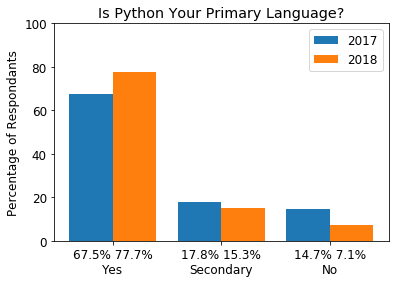

In [21]:
#using seaborn for a count plot does not allow for normalization. Therefore had to use matplotlib
plt.rcParams.update({'font.size': 12})
p1 = plt.bar(np.arange(len(py_uses)/2), py_uses.loc['2017'], -0.4, align = 'edge')
p2 = plt.bar(np.arange(len(py_uses)/2), py_uses.loc['2018'], 0.4, align = 'edge')
plt.legend((p1[0], p2[0]), ('2017', '2018'))
plt.xticks(np.arange(len(py_uses)/2), (str("{:.1f}".format(py_uses[0])) + '% '+ str("{:.1f}".format(py_uses[3])) +'%\nYes' , 
                                       str("{:.1f}".format(py_uses[1])) + '% '+ str("{:.1f}".format(py_uses[4])) +'%\nSecondary', 
                                       str("{:.1f}".format(py_uses[2])) + '% '+ str("{:.1f}".format(py_uses[5])) +'%\nNo'))
plt.title('Is Python Your Primary Language?')
plt.ylabel('Percentage of Respondants')
plt.ylim(0,100)
#Change to yes and no only
plt.show()

#### Observations:
>The figure above shows that from 2017 to 2018 the percentage of people who use python as a primary language is increasing while the number that use it as as a secondary or tertiary language is decreasing. This indicates that python is becoming more and more important for people in for their projects and daily jobs.

### Analyzing the Change in Language Popularity:
>Next, to answer how python is being used we will look to see what other languages people are using along with python to do their jobs. Depending on if people are using JavaScript for websites, or Java or Python for back end development will help to clarify what people are using it for.

In [22]:
#Function that takes two lists and calculates the difference between thier values and sorts them accordingly
def sort_dif(list1, list2 , category):
    
    #Create 2 new array to hold new values
    sortedList = []
    newIndex = []
    
    #Create a list of values which are the differences between list1 and list2
    indices = list1.index
    for index in indices:
        data = list2.loc[index] - list1.loc[index]
        sortedList.append(data)
    
    #convert sortedList into series to sort
    sortedList = pd.Series(sortedList, index = list1.index)
    sortedList.sort_values(ascending=True, inplace=True)
    #print(sortedList)
    
    #Reindex the lists to be in order of change
    list1 = list1.reindex(sortedList.index)
    list2 =list2.reindex(sortedList.index)
    
    #add values to index labels for graph beautification
    indices = list(list1.index)
    for index in indices:
        swap = str(index)
        swap = swap.replace(category, '')
        swap = swap + '   (' + str("{:.2f}".format(list1.loc[index]))+'%)\n' + 'Percent Difference:  ' + str("{:.2f}".format(sortedList.loc[index]))+ '%   (' + str("{:.2f}".format(list2.loc[index]))+'%)'     
        newIndex.append(swap)
        
    list1.set_axis(newIndex, inplace = True)
    list2.set_axis(newIndex, inplace = True)
    
    return list1, list2

In [23]:
#Easily creates a dataframe with all columns that involve a language. 
#Cleaner and easier to read than using loc
df17_languages = df17.filter(regex = 'What other language').count()
df17_languages = df17_languages.apply(percent, args=(num2017,))

df18_languages = df18.filter(regex = 'What other language').count()
df18_languages = df18_languages.apply(percent, args=(num2018,))

#Used to change index labels to provide more information for the graph
df17_languages, df18_languages = sort_dif(df17_languages, df18_languages, 'What other language(s) do you use?')

#   sort only one set of values and then match index order.
#   because when I do both the numbers no longer match to the indices
df18_languages.sort_values(ascending = False, inplace = True)
df17_languages = df17_languages.reindex(df18_languages.index)
 

Text(0.5,1,'What other language(s) do you use?')

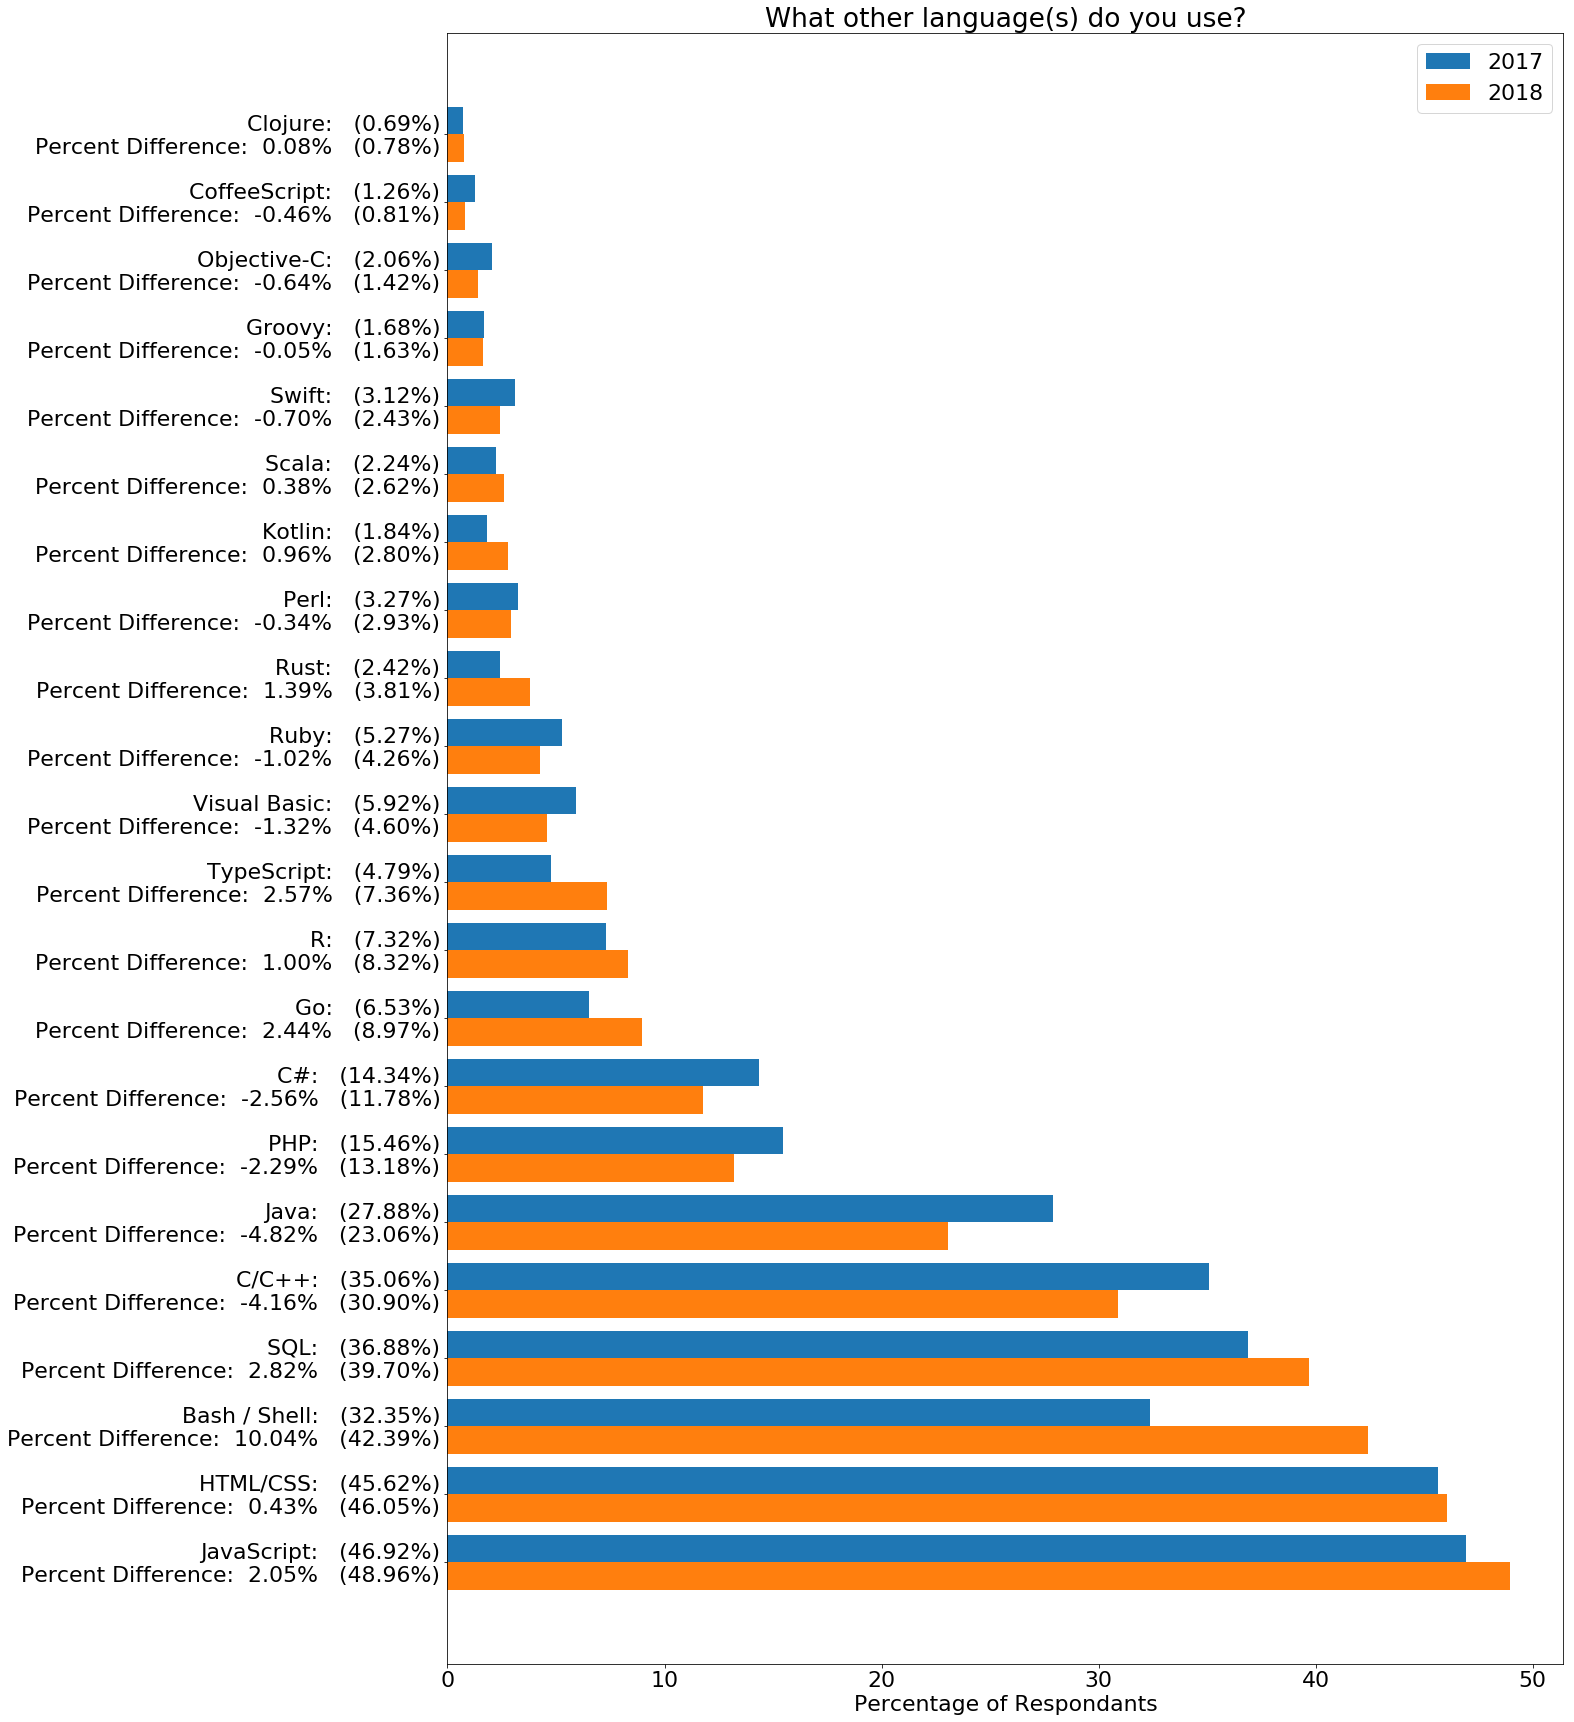

In [24]:
plt.figure(figsize=(20,30))
plt.rcParams.update({'font.size': 22})
plt.legend((p1[0], p2[0]), ('2017', '2018'))
p1 = plt.barh(np.arange(len(df17_languages)), df17_languages, 0.4, align = 'edge')
p2 = plt.barh(np.arange(len(df18_languages)), df18_languages, -0.4, align = 'edge')
plt.yticks(np.arange(len(df17_languages)),df17_languages.index)
plt.xlabel('Percentage of Respondants')
plt.title('What other language(s) do you use?')

#### Observations:
>As you can see the most common language to know in combination with python is JavaScript. Along with its increase in use from 2017 to 2018 it suggests that UCSD should offer a JavaScript class in their data science program so that the students can be prepared for their careers. The languages with the biggest change between the two years are bash/shell and SQL. This suggests that there is an increase need for an understanding of databases for machine learning and linux in general.

In [25]:
job_counts17 = df17.filter(regex='What do you use Python for').count()
job_counts18 = df18.filter(regex='What do you use Python for').count()

job_counts17 = job_counts17.apply(percent, args=(num2017,))
job_counts18 = job_counts18.apply(percent, args=(num2018,))

job_counts17, job_counts18 = sort_dif(job_counts17, job_counts18, 'What do you use Python for?')
#   sort only one set of values and then match index order.
#   because when I do both sets the numbers no longer match to the correct index
job_counts18.sort_values(ascending = False, inplace = True)
job_counts17 = job_counts17.reindex(job_counts18.index)

Text(0.5,1,'What do you use Python for?')

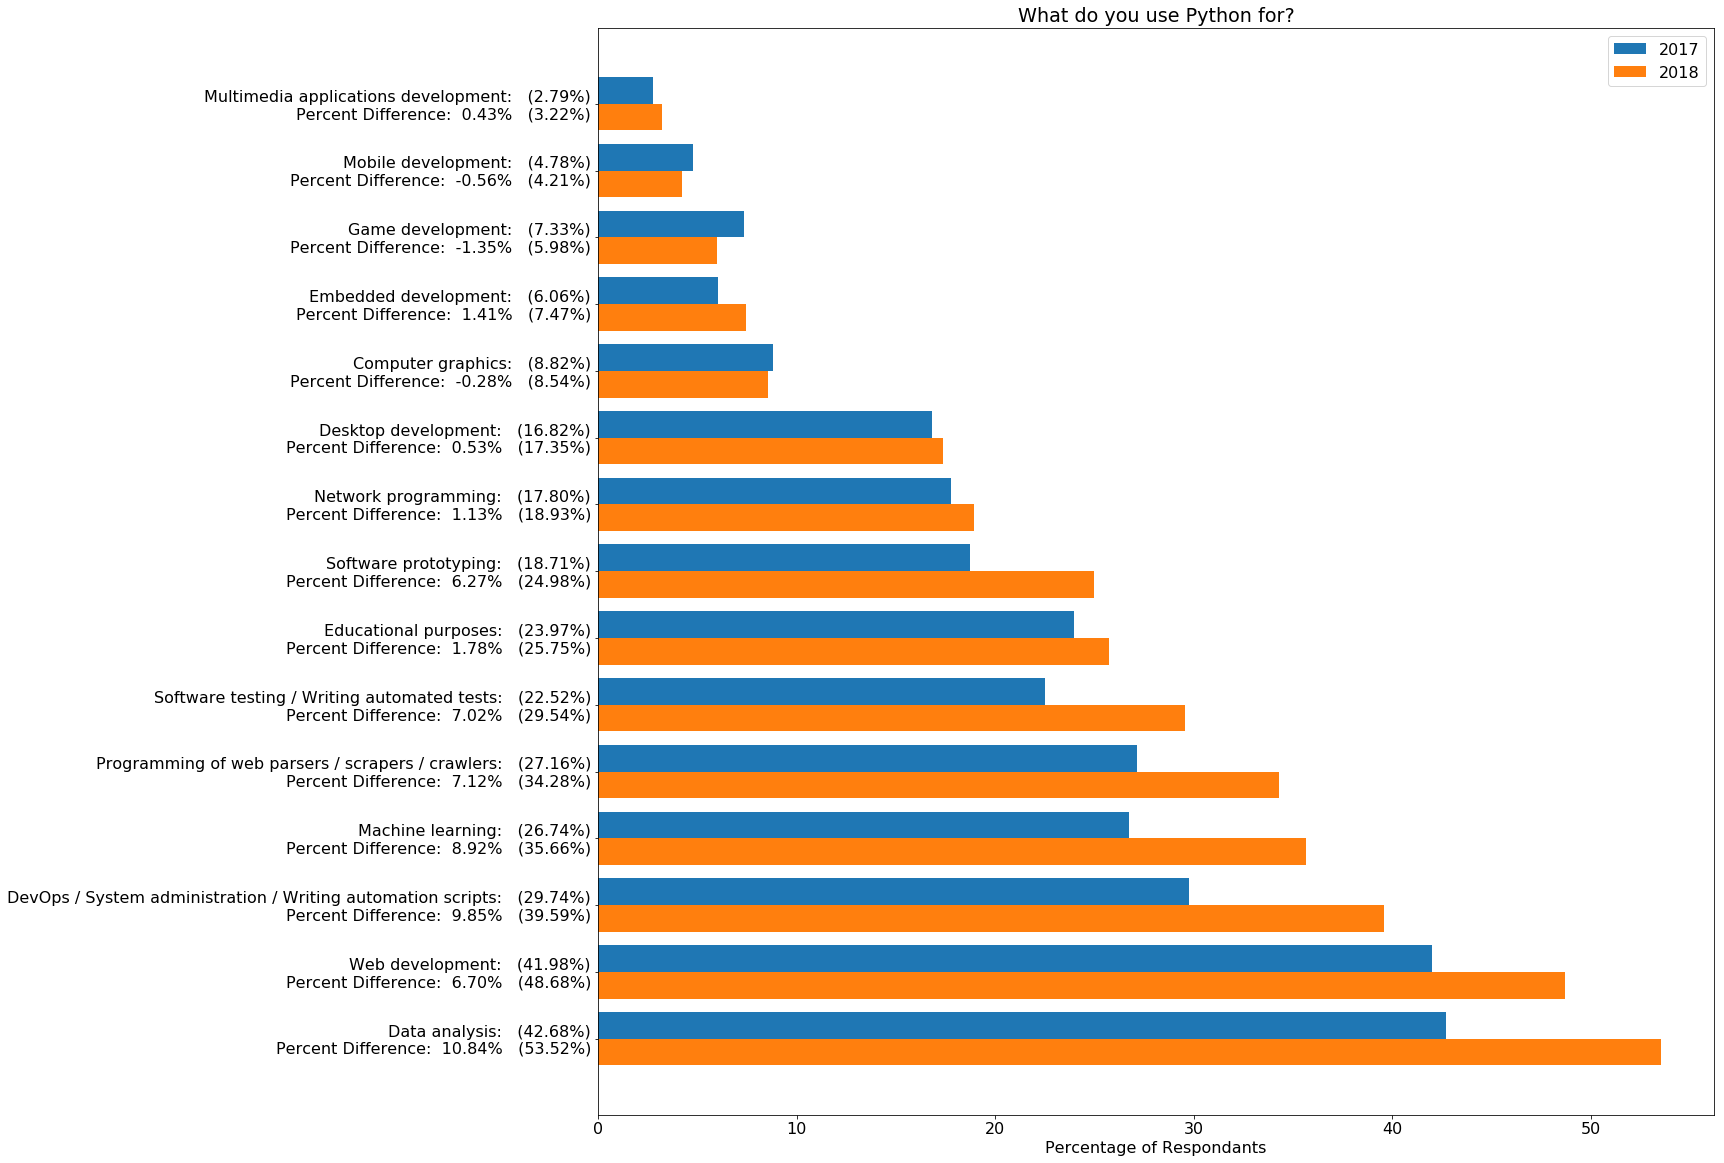

In [26]:
plt.figure(figsize=(20,20))
plt.rcParams.update({'font.size': 16})
plt.legend((p1[0], p2[0]), ('2017', '2018'))
p1 = plt.barh(np.arange(len(job_counts17)), job_counts17, 0.4, align = 'edge')
p2 = plt.barh(np.arange(len(job_counts18)), job_counts18, -0.4, align = 'edge')
plt.yticks(np.arange(len(job_counts17)),job_counts17.index)
plt.xlabel('Percentage of Respondants')
plt.title('What do you use Python for?')

#### Observations:
>The above chart does indicates the most popular use for python is not in fact machine learning but data analysis. However, it appears that data analysis and webdevelopment are close and it would be good to see how large a role python plays into data science. The data breaks down the field of data science into 3 categories (Machine Learning, Data Analaysis, and Data Gathering). If you combine those 3 fields and remove them from the chart you get a much better representation of how large a role python plays in data science.

In [27]:
#Count the number of individuals who do either of the three
df17['Data Science:What do you use Python for?'] = None
df18['Data Science:What do you use Python for?'] = None


df17.loc[pd.notnull(df17['Machine learning:What do you use Python for?']),'Data Science:What do you use Python for?'] = 'yes'
df17.loc[pd.notnull(df17['Data analysis:What do you use Python for?']),'Data Science:What do you use Python for?'] = 'yes'
df17.loc[pd.notnull(df17['Programming of web parsers / scrapers / crawlers:What do you use Python for?']),'Data Science:What do you use Python for?'] = 'yes'

df18.loc[pd.notnull(df18['Machine learning:What do you use Python for?']),'Data Science:What do you use Python for?'] = 'yes'
df18.loc[pd.notnull(df18['Data analysis:What do you use Python for?']),'Data Science:What do you use Python for?'] = 'yes'
df18.loc[pd.notnull(df18['Programming of web parsers / scrapers / crawlers:What do you use Python for?']),'Data Science:What do you use Python for?'] = 'yes'

#dfRevised17

In [28]:
job_counts17 = df17.filter(regex='What do you use Python for').count()
job_counts18 = df18.filter(regex='What do you use Python for').count()

job_counts17 = job_counts17.apply(percent, args=(num2017,))
job_counts18 = job_counts18.apply(percent, args=(num2018,))

job_counts17 = job_counts17.drop(['Machine learning:What do you use Python for?', 'Data analysis:What do you use Python for?', 'Programming of web parsers / scrapers / crawlers:What do you use Python for?'])
job_counts18 = job_counts18.drop(['Machine learning:What do you use Python for?', 'Data analysis:What do you use Python for?', 'Programming of web parsers / scrapers / crawlers:What do you use Python for?'])

job_counts17, job_counts18 = sort_dif(job_counts17, job_counts18, 'What do you use Python for?')
#   sort only one set of values and then match index order.
#   because when I do both sets the numbers no longer match to the correct index
job_counts18.sort_values(ascending = False, inplace = True)
job_counts17 = job_counts17.reindex(job_counts18.index)

Text(0.5,1,'What do you use Python for? - Modified')

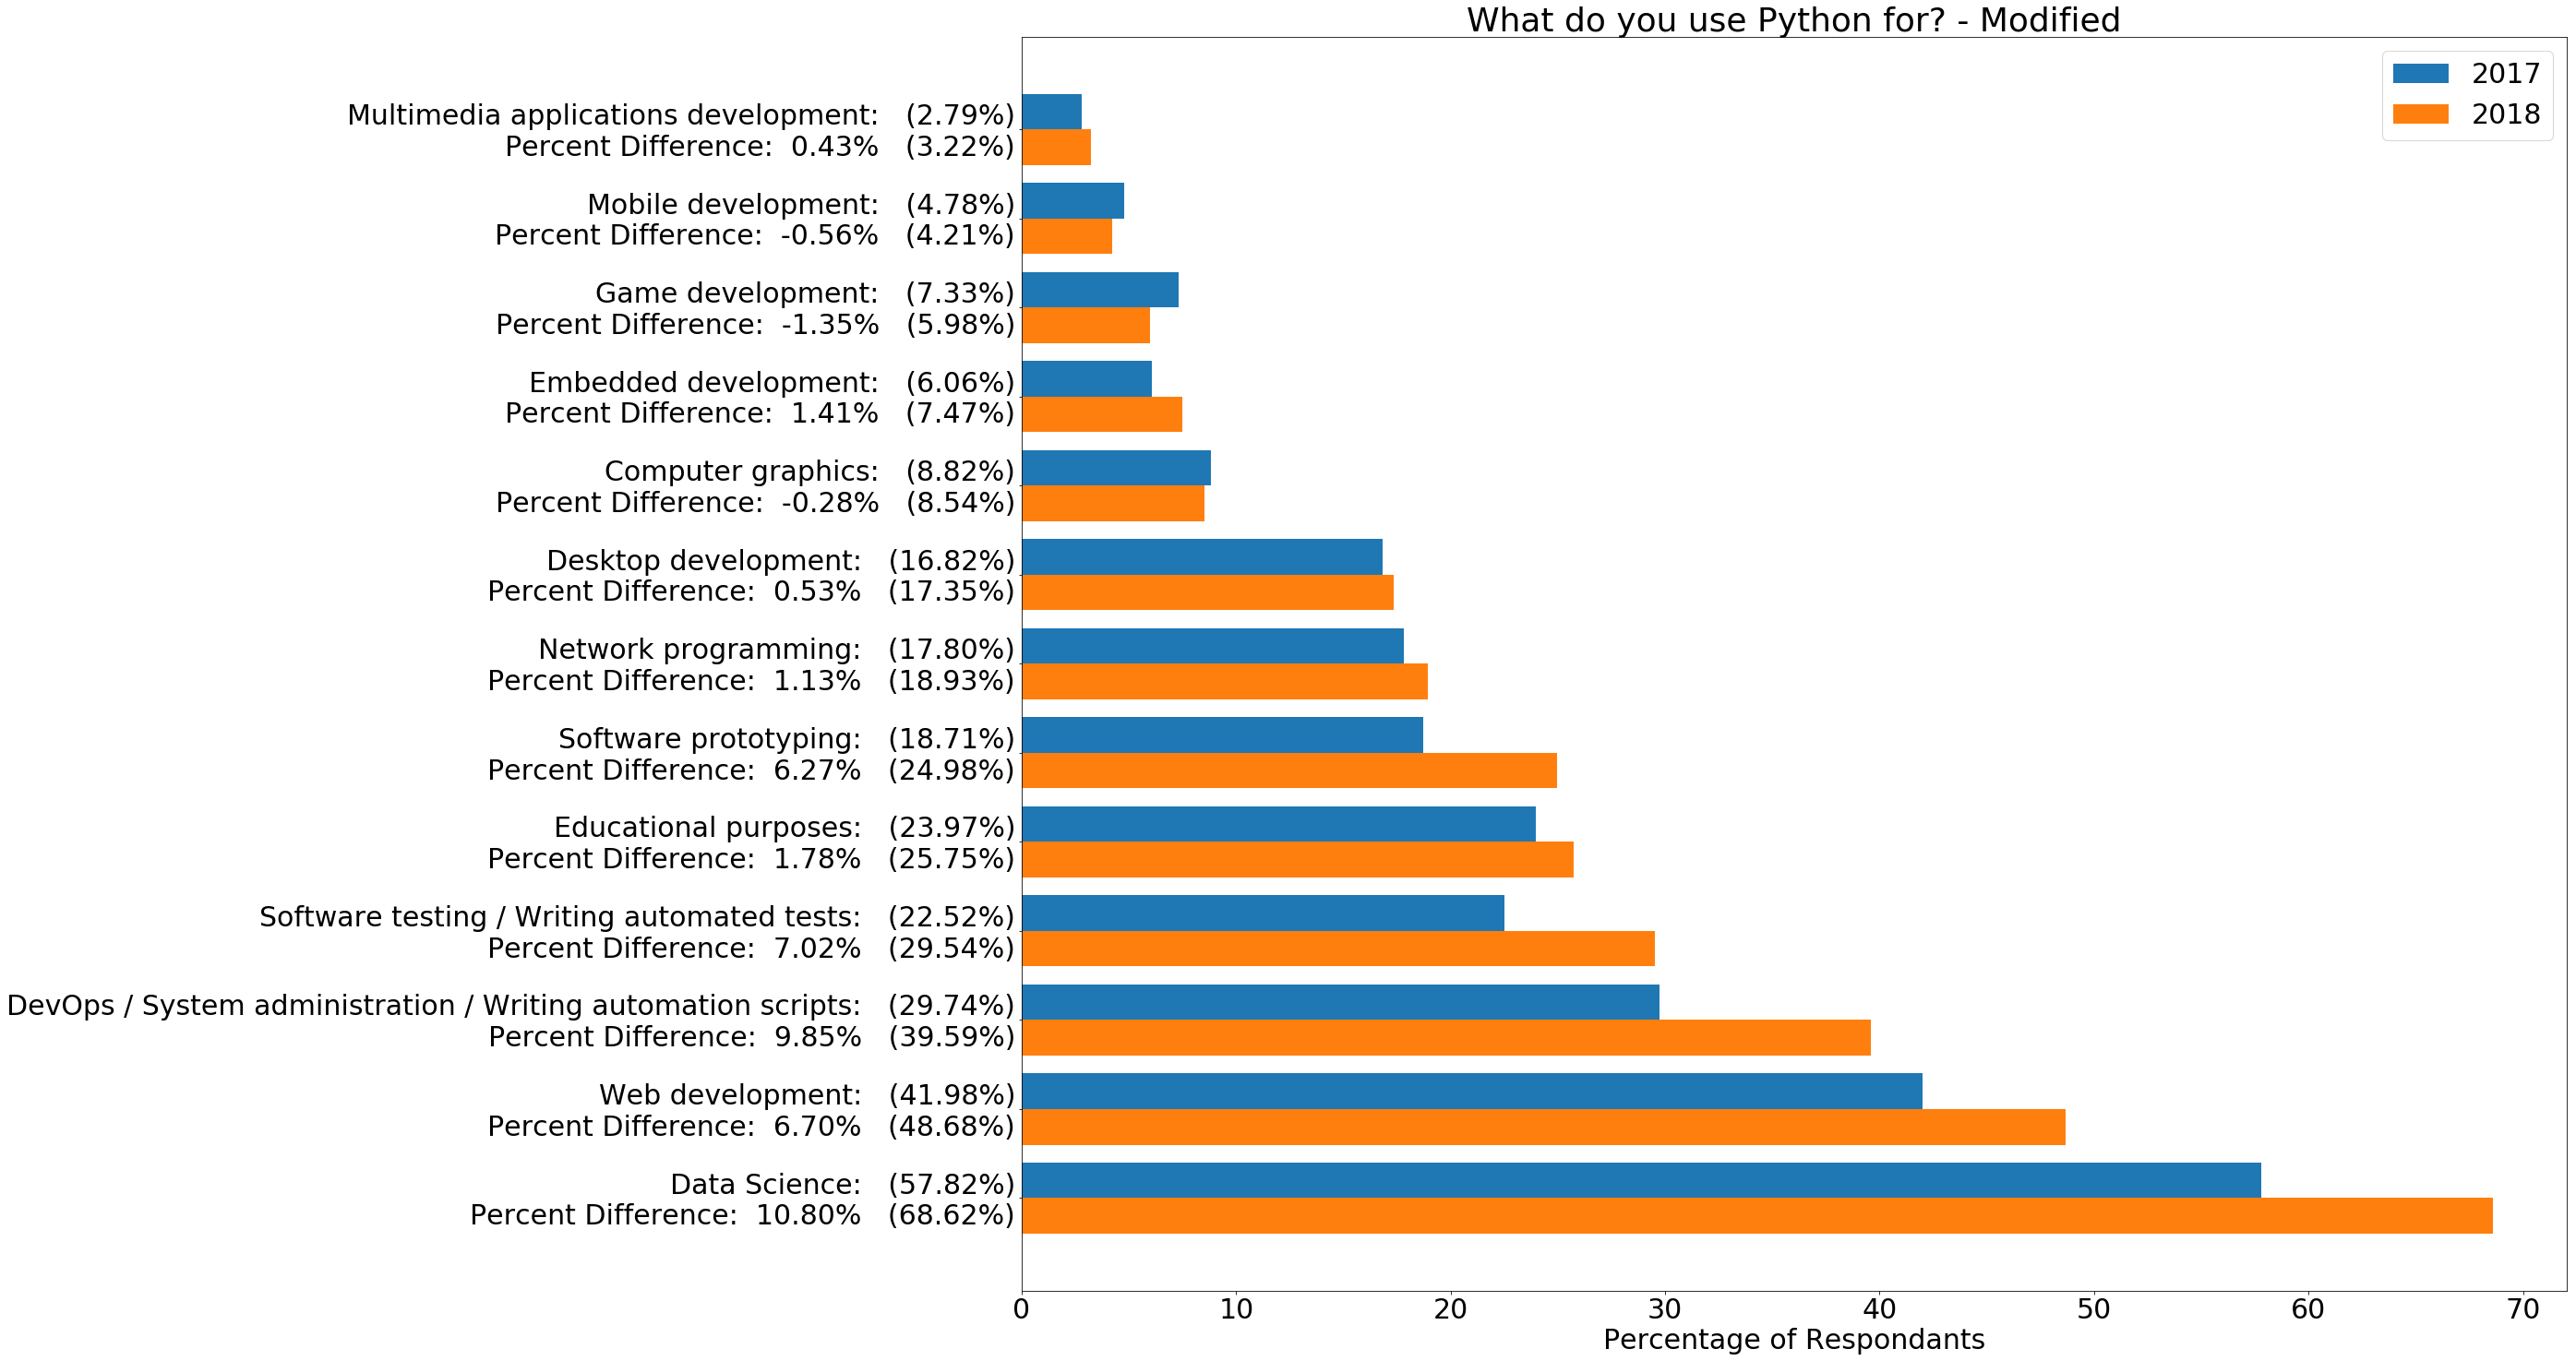

In [29]:
plt.figure(figsize=(30,25))
plt.rcParams.update({'font.size': 30})
plt.legend((p1[0], p2[0]), ('2017', '2018'))
p1 = plt.barh(np.arange(len(job_counts17)), job_counts17, 0.4, align = 'edge')
p2 = plt.barh(np.arange(len(job_counts18)), job_counts18, -0.4, align = 'edge')
plt.yticks(np.arange(len(job_counts17)),job_counts17.index)
plt.xlabel('Percentage of Respondants')
plt.title('What do you use Python for? - Modified')

#### Observations:
>By combining the 3 subcategories into 1 titled, data science you can see that Python went from being used by less than 60% of respondants for data science to almost 70% with a nearly 11% increase while Web development only experienced a 6.7% increase. This strongly suggests that python is being used primarily for data science. However, it would be interesting to see which subcategories are the largest in data science and how rapidly they are growing.

In [30]:
top317 = df17.loc[:,['Machine learning:What do you use Python for?','Data analysis:What do you use Python for?', 'Programming of web parsers / scrapers / crawlers:What do you use Python for?']]
top318 = df18.loc[:,['Machine learning:What do you use Python for?','Data analysis:What do you use Python for?', 'Programming of web parsers / scrapers / crawlers:What do you use Python for?']]

top317 = top317.count()
top318 = top318.count()

top317 = top317.apply(percent, args=(num2017,))
top318 = top318.apply(percent, args=(num2018,))

top317, top318 = sort_dif(top317, top318, 'What do you use Python for?')

Text(0.5,0,'Percentage of Respondants')

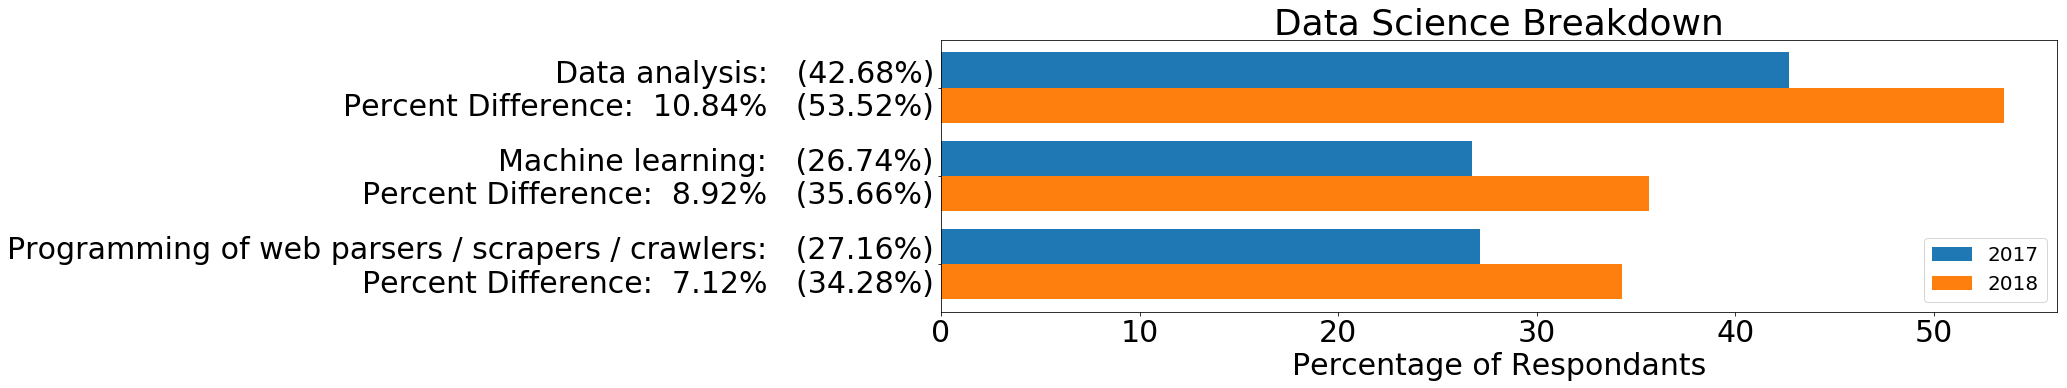

In [31]:
plt.figure(figsize=(20,5))
plt.title('Data Science Breakdown')
plt.rcParams.update({'font.size': 20})
plt.legend((p1[0], p2[0]), ('2017', '2018'))
p1 = plt.barh(np.arange(len(top317)), top317, 0.4, align = 'edge')
p2 = plt.barh(np.arange(len(top318)), top318, -0.4, align = 'edge')
plt.yticks(np.arange(len(top317)), top317.index)
plt.xlabel('Percentage of Respondants')

#### Observations:
>This shows us that Data analysis is bother the largest and fastest growing sub category to machine learning. 

### Analysis of Most Popular Frameworks:
To help further determine how python is being used we can look at the most popular frameworks people are using. This allows us to see how they are using python within their projects in particular along with their chosen professions.

In [32]:
df17.drop(df17.filter(regex='Other').columns, axis=1, inplace = True)

frameworks17 = (df17.filter(regex = 'framework')).count()
frameworks18 = (df18.filter(regex = 'framework')).count()

frameworks17 = frameworks17.apply(percent, args= (num2017,))
frameworks18 = frameworks18.apply(percent, args= (num2018,))

frameworks17, frameworks18 = sort_dif(frameworks17, frameworks18, 'What framework(s) do you use in addition to Python?')

Text(0.5,1,'What framework(s) do you use in addition to Python?')

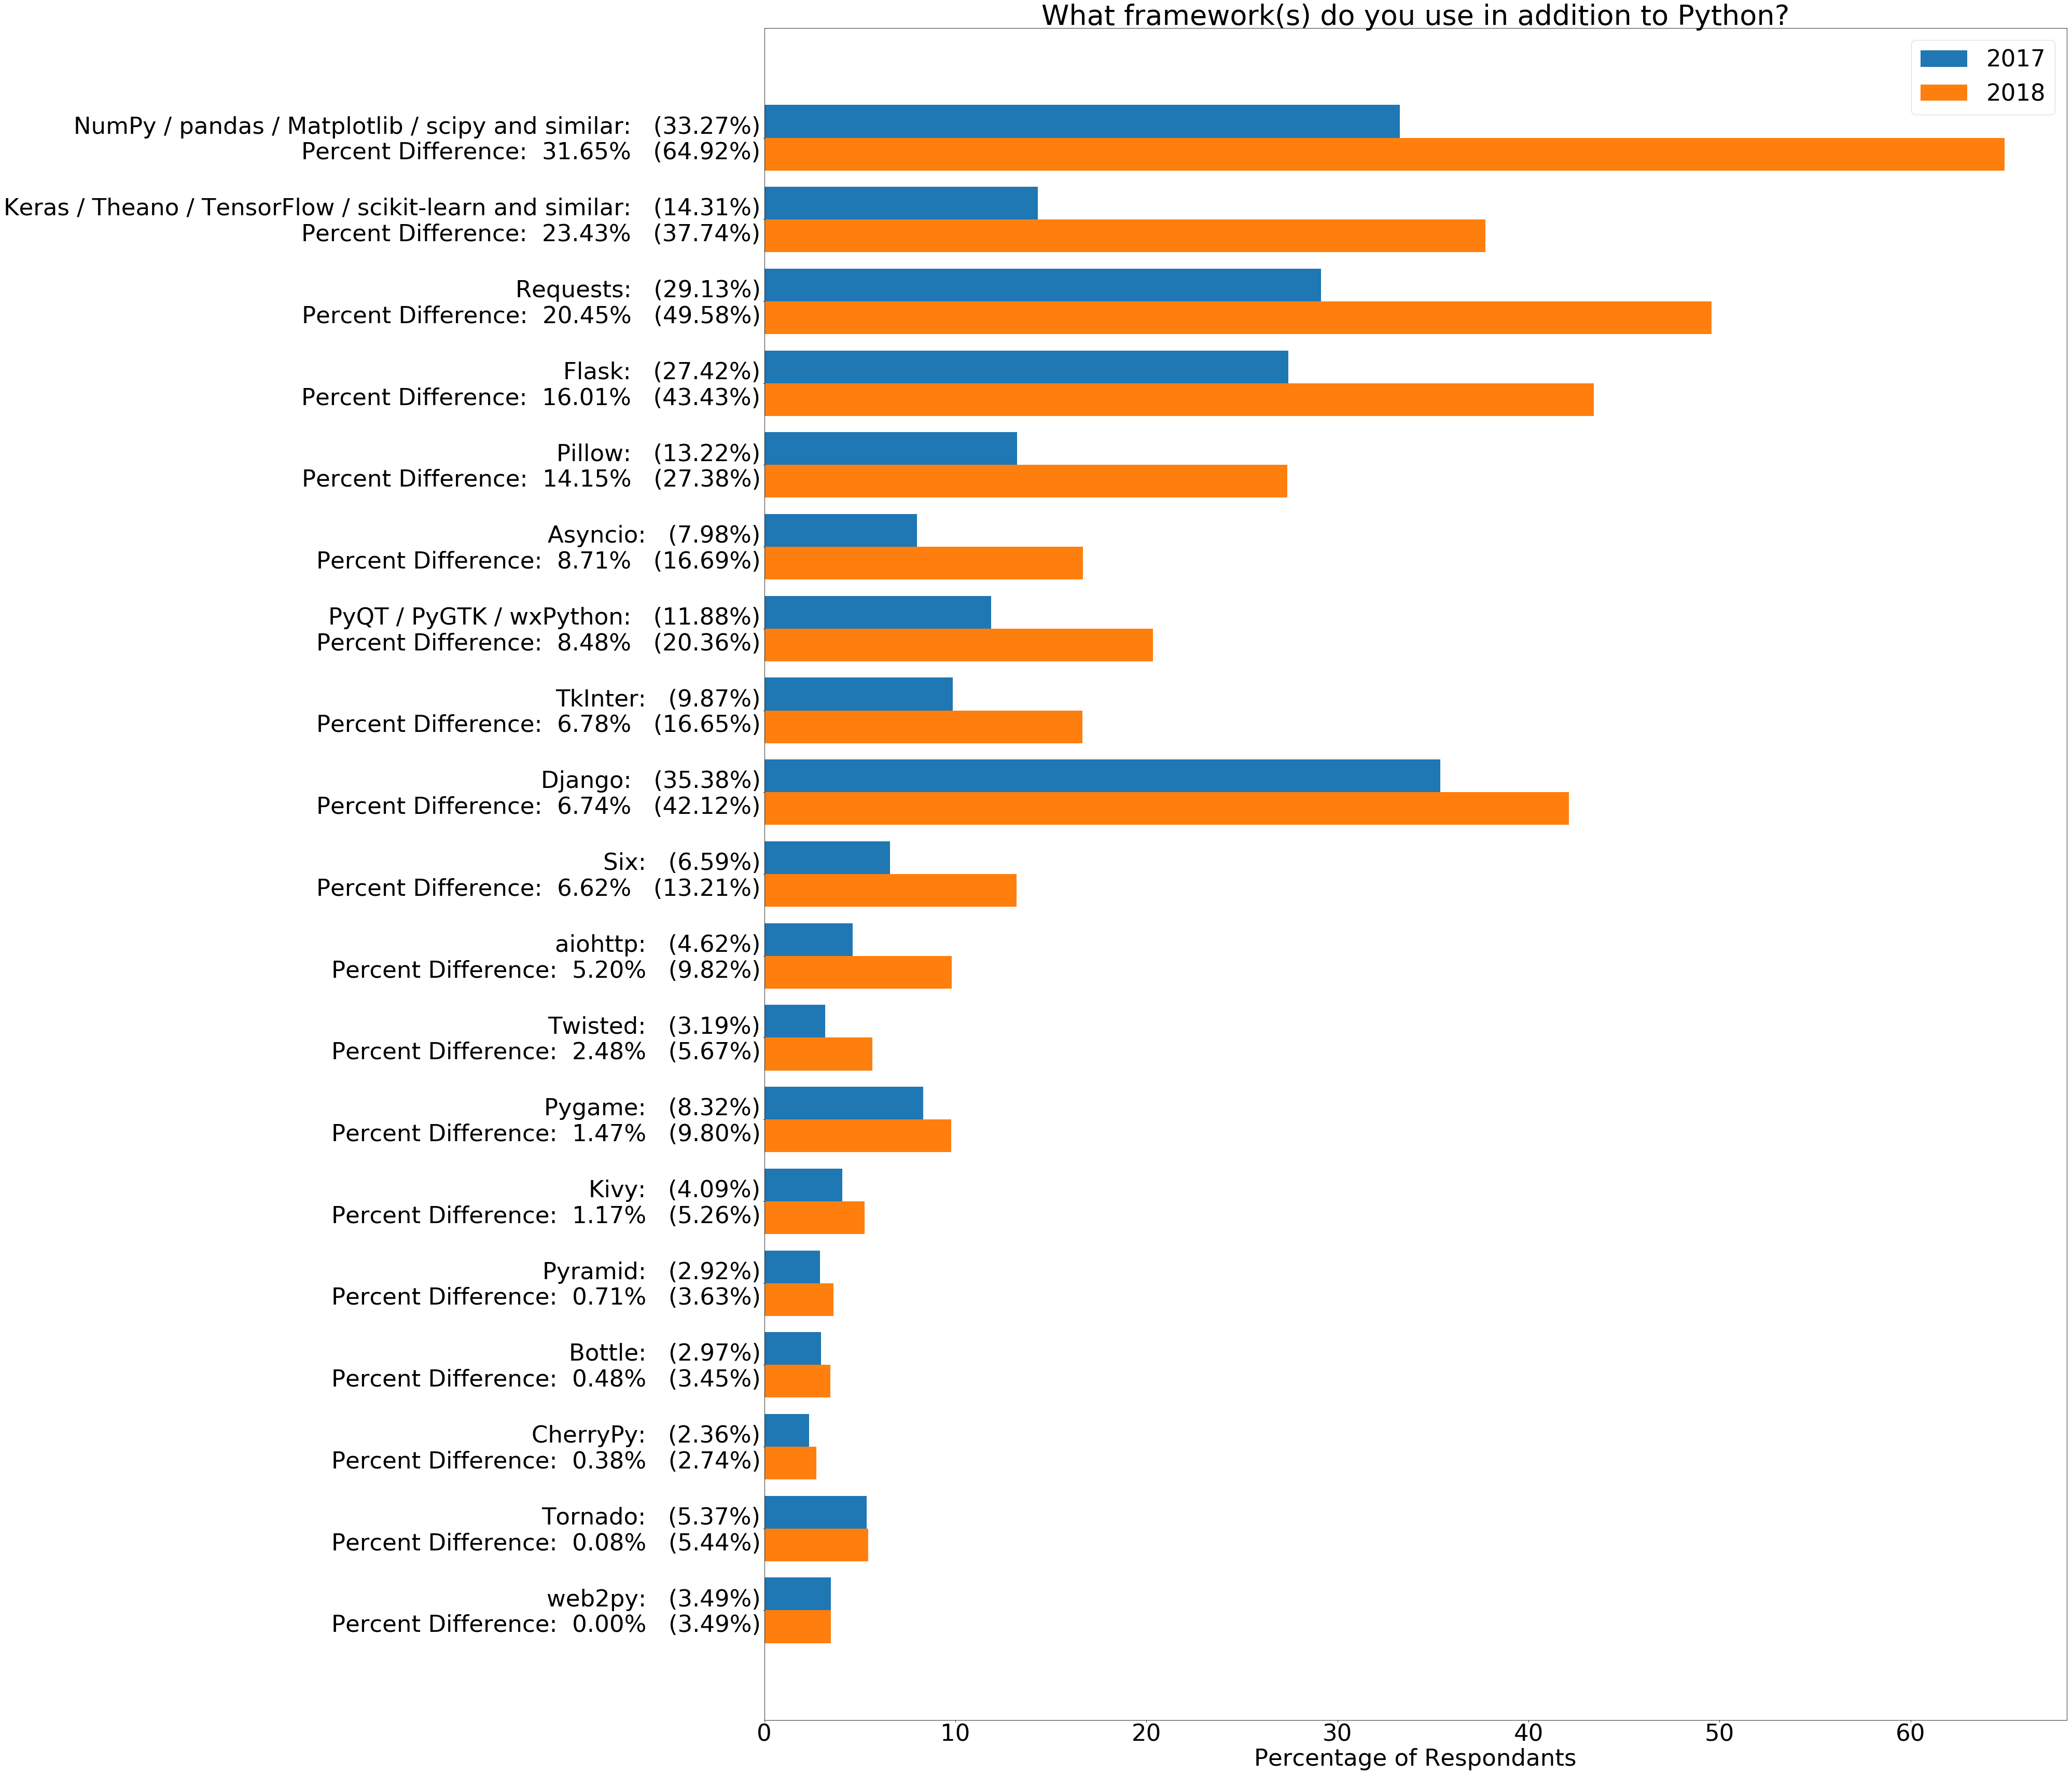

In [33]:
plt.figure(figsize=(45,60))
plt.rcParams.update({'font.size': 45})
plt.legend((p1[0], p2[0]), ('2017', '2018'))
p1 = plt.barh(np.arange(len(frameworks17)), frameworks17, 0.4, align = 'edge')
p2 = plt.barh(np.arange(len(frameworks18)), frameworks18, -0.4, align = 'edge')
plt.yticks(np.arange(len(frameworks17)),frameworks17.index)
plt.xlabel('Percentage of Respondants')
plt.title('What framework(s) do you use in addition to Python?')

#### Observations:
> The most popular frameworks to use are the data analysis frameworks, pandas, numpy, Matplotlib and scipy. The use of these four frameworks more than doubled from 2017 becoming way more popular than the original leader Django. This shows just how important data analyst skills are becoming in the python job market.

In [34]:
#Retreive frameworks again to reset index titles
frameworks17 = (df17.filter(regex = 'framework')).count()
frameworks18 = (df18.filter(regex = 'framework')).count()

frameworks17 = frameworks17.apply(percent, args= (num2017,))
frameworks18 = frameworks18.apply(percent, args= (num2018,))

#calculate the percent growth of use for each framework
framework_growth = (frameworks18 - frameworks17)/frameworks17*100
framework_growth.sort_values(ascending=False, inplace=True)

#add values to index labels for graph beautification
newIndex = []
indices = list(framework_growth.index)
for index in indices:
    swap = str(index)
    swap = swap.replace('What framework(s) do you use in addition to Python?', '')
    swap = swap + ' (' + str("{:.2f}".format(framework_growth.loc[index]))+'%)' 
    newIndex.append(swap)  
    
framework_growth.set_axis(newIndex, inplace = True)

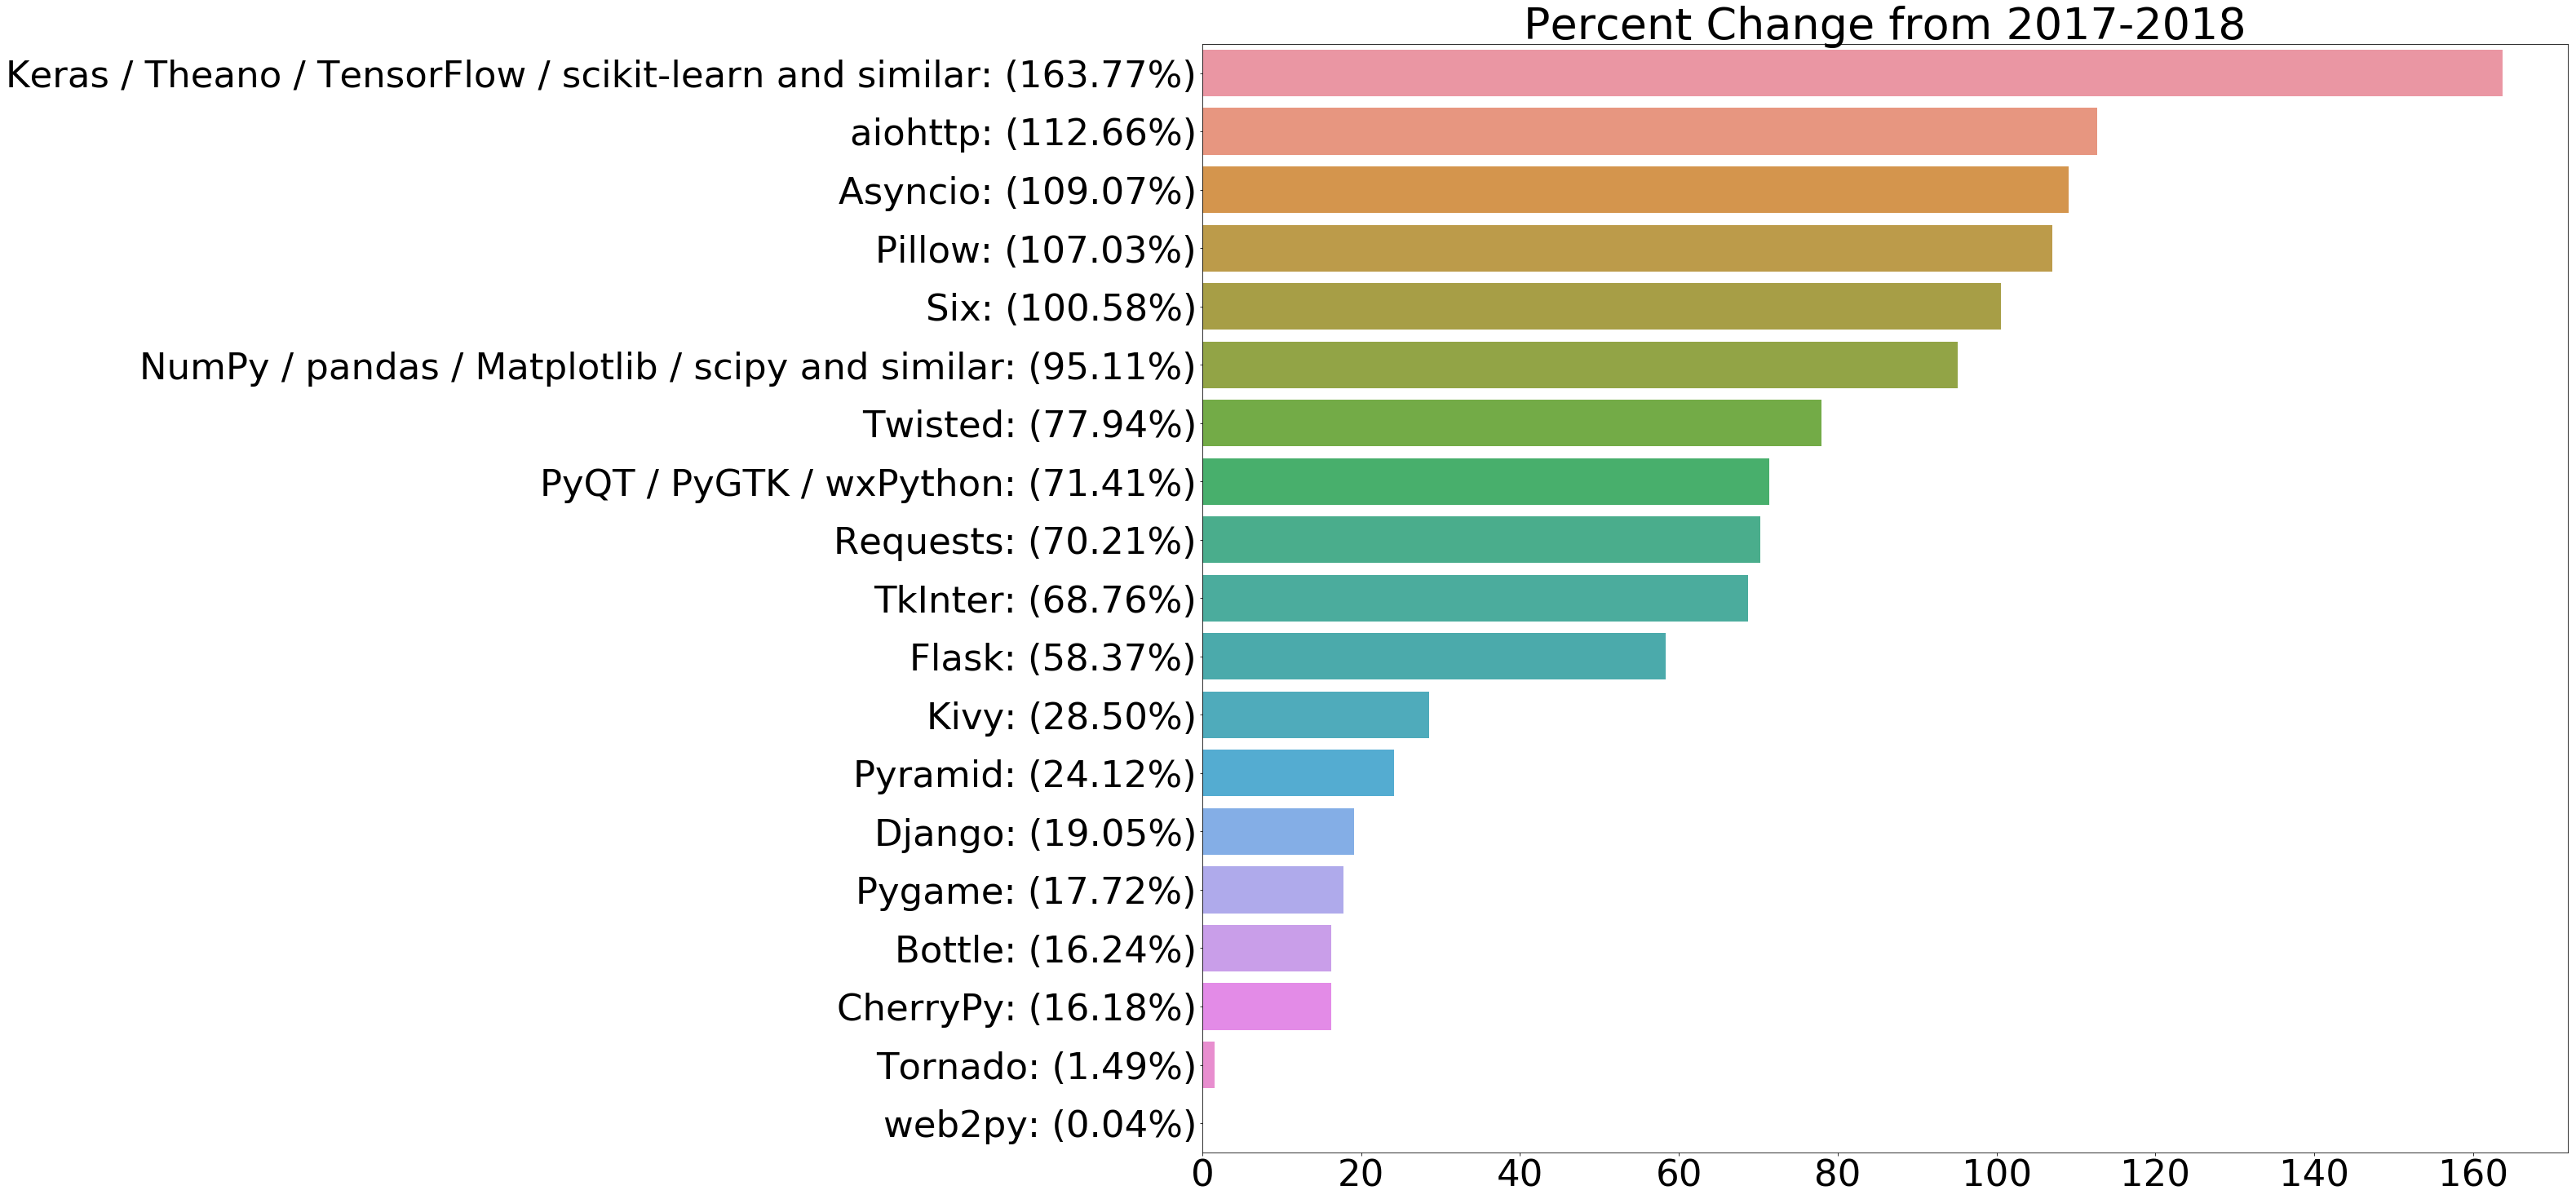

In [35]:
sns.barplot(x=framework_growth, y = framework_growth.index )
fig = plt.gcf()
plt.title('Percent Change from 2017-2018')
fig.set_size_inches(30,25)

#### Observations:
>This shows that the fastest growing frameworks are the frameworks for data science, specifically those for machine learning. However, many of those frameworks can also be used for data analysis, therefore it creates overlap and it cannot be determined if the fastest frameworks are for machine learning or data analysis.

# Part 3: Results, Conclusion, and Discussion:

My initial hypothesis was that python was primarily being used for machine learning. I made this hypothesis because my Google news feed is constantly talking about up how python is being used for machine learning everywhere and also because UCSD offers several courses using Python and machine learning. I wanted to look and see what kind of uses I would have for python after graduatinig. However, after analyzing the data gathered from two different surveys spanning the years 2017 and 2018 the results showed that my hypothesis was wrong.

My research shows that machine learning is not the most popular use of Python but that data analysis is the most popular. This indicates that while machine learning is a hot topic, right now most people are using python in order to gain insight from either user data, or data measurements. This indicates the need for a more robust data analysis track of classes at UCSD. UCSD should institute a statitistics class specifically for their new data science major that uses python for all the analyses so that students can be prepared for future careers, while still learning the same statistics that the math majors go through. Doing wo will help to increase student learning by strengthening the use of data science tools in a statistical setting.

However, because the machine learning frameworks are the fastest growing frameworks being used, UCSD should make sure students are exposed to and have practice using these frameworks. It won't be long until machine learning becomes more popular for python that data analysis and UCSD needs to be prepared. 

I have never been exposed to TensorFlow, Keras, or Theano and after doing my analysis, before I begin to apply for jobs after graduation I need to make sure that I take some online classes that offer these frameworks.